# Investigating a Dataset - Medical Appointment No-Show Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this report, we will be investigating data on medical appointments and patient no-shows for a clinic in Brazil.  The goal of this report is to find ways to reduce no-shows and improve the effeciency of this medical clinc.
>


In [168]:
# Import statements for packages used in this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


## General Properties

In [2]:
# Loading data and inspecting 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#reviewing the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [4]:
#Looking for duplicate rows
sum(df.duplicated())

0

In [5]:
#looking for missing info
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


# Data Cleaning - notes below

In [6]:
# Dropping unnecessary rows (patientId and appointmentId)
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#confirming columns dropped
df.head(0)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [7]:
#renaming columns
column_list = {'Neighbourhood' : 'Neighborhood', 
              'No-show' : 'Missed_appointment', 
              'ScheduledDay' : 'Scheduled_day', 
              'AppointmentDay' : 'Appointment_day', 
              'Scholarship' : 'Wellfare',
              'Handcap' : 'Handicap'}
df.rename(columns=column_list, inplace=True)

#confirming column name changed
df.head(0)

,Gender,Scheduled_day,Appointment_day,Age,Neighborhood,Wellfare,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Missed_appointment


In [8]:
#converting 'scheduled day' and 'appointment day' to datetime format
df['Scheduled_day'] = pd.to_datetime(df['Scheduled_day'])
df['Appointment_day'] = pd.to_datetime(df['Appointment_day'])

#checking to see if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   Gender              110527 non-null  object             
 1   Scheduled_day       110527 non-null  datetime64[ns, UTC]
 2   Appointment_day     110527 non-null  datetime64[ns, UTC]
 3   Age                 110527 non-null  int64              
 4   Neighborhood        110527 non-null  object             
 5   Wellfare            110527 non-null  int64              
 6   Hipertension        110527 non-null  int64              
 7   Diabetes            110527 non-null  int64              
 8   Alcoholism          110527 non-null  int64              
 9   Handicap            110527 non-null  int64              
 10  SMS_received        110527 non-null  int64              
 11  Missed_appointment  110527 non-null  object             
dtypes: datetime64[ns

In [9]:
#Adjusting the "Wellfare" column to object data type
df['Wellfare'] = df['Wellfare'].astype(object)

#Replacing the values in the "Wellfare" columns with more appropriate values (Yes or No)
df['Wellfare'].replace(0, "no", inplace=True)
df['Wellfare'].replace(1, "yes", inplace=True)

#Verify it worked
df['Wellfare'].head(10)

0    no
1    no
2    no
3    no
4    no
5    no
6    no
7    no
8    no
9    no
Name: Wellfare, dtype: object

<a id='eda'></a>
# Exploratory Data Analysis


### Question #1 - Which appointment reason/diagnosis lead to the most missed appointments?

In [93]:
#totaling the missing appointments for each diagnosis
#first, creating a temporary DF for just the appointment reasons
df_appointments = df[['Missed_appointment', 'Hipertension', 'Diabetes', 'Alcoholism','Handicap']]

In [94]:
#calculating the the total appointments for each diagnosis
totals = df_appointments.sum(numeric_only=True)
totals

Hipertension    21801
Diabetes         7943
Alcoholism       3360
Handicap         2459
dtype: int64

In [95]:
#calculating the missing appointments for each diagnosis
missed_appts = df_appointments.query('Missed_appointment == "Yes"')
missed_appts.sum(numeric_only=True)

Hipertension    3772
Diabetes        1430
Alcoholism       677
Handicap         453
dtype: int64

In [96]:
#calcualting the proportions of missed appointments vs total appointments for each diagnosis
proportions = (missed_appts / totals).sum(numeric_only=True)
proportions

Alcoholism      0.201488
Diabetes        0.180033
Handicap        0.184221
Hipertension    0.173020
dtype: float64

### Question #2  - Does sending an SMS message impact the chance of a no-show?

In [178]:
#creating a temporary dataframe for missed appointments and SMS_received
df_sms = df[['Missed_appointment', 'SMS_received']]

#finding total appointments that received an SMS and total appointments that did not
total_no_sms = df['SMS_received'].value_counts()[0]
total_sms = df['SMS_received'].value_counts()[1]

In [179]:
#finding total no-shows for missed appointments with an SMS and with out
sms_no_show = df_sms.query('Missed_appointment == "Yes"').value_counts()[1]
no_sms_no_show = df_sms.query('Missed_appointment == "Yes"').value_counts()[0]

In [180]:
#calculating the probability that someone who receives an SMS will NOT show up to the appointment
percent_no_show_w_sms = sms_no_show / total_sms
percent_no_show_w_sms

0.27574544839637

In [183]:
#calculating the probability that someone who does not receive an SMS will NOT show up to the appointment
percent_no_show_wo_sms = no_sms_no_show / total_no_sms
percent_no_show_wo_sms

0.16703311346525418

<a id='conclusions'></a>
# Conclusions


## Our first research question was to explore which appointment types are yeidling the highest proportion of no-shows.

### Based on the visual below, we can see that alcohol related appointments result in the highest rate of no-shows, or missed appointments.  We can assume that nearly 20% of all alcohol related appointments will be no-shows.

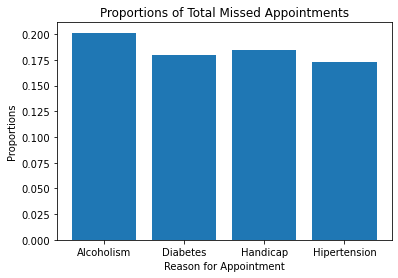

In [187]:
#creating visual for research question #1
x_coord = ['Alcoholism', 'Diabetes', 'Handicap', 'Hipertension']
plt.bar(x_coord, proportions)
plt.title('Proportions of Total Missed Appointments')
plt.xlabel('Reason for Appointment')
plt.ylabel('Proportions')
plt.show()

## Our second research question was to research and discover the impact an SMS message has on patient no-shows

### Based on the two visuals below, we can see that there is actually a higher percent chance that a patient will show up without receiving an SMS message.   From those who received an SMS, there was a 27.5% chance of a no-show.  From those who did not receive an SMS, only a 16.7% chance.
### I found this interesting.  My initial assumption was that an SMS reminder would decrease the chance of a no-show, however, that doesn't appear to be the case based on the data we have.  There is actually a higher percentage of no-shows when an SMS is involved.

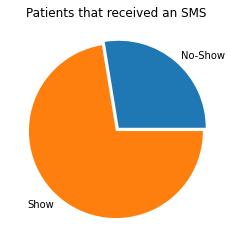

In [195]:
sms = np.array([percent_no_show_w_sms, 1-percent_no_show_w_sms])
explode = [.05,0]
plt.pie(sms, labels=["No-Show", "Show"], explode=explode)
plt.title("Patients that received an SMS")
plt.show()

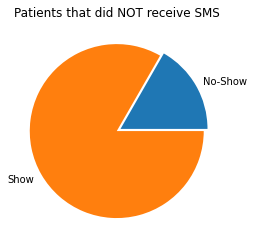

In [197]:
sms = np.array([percent_no_show_wo_sms, 1-percent_no_show_wo_sms])
plt.pie(sms, labels=["No-Show", "Show"], explode=explode)
plt.title("Patients that did NOT receive SMS")
plt.show()